In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
# Load dataset
df = pd.read_csv("C:/Users/mansi/Downloads/car data.csv")

In [11]:
# Data Preprocessing
data = df.copy()

In [12]:
data['Brand'] = data['Car_Name'].apply(lambda x: x.split()[0])
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Brand
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,ritz
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,sx4
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,ciaz
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,wagon
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,swift
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,city
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,brio
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,city
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,city


In [13]:
data.drop('Car_Name', axis=1, inplace=True)
data

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Brand
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,ritz
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,sx4
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,ciaz
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,wagon
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,swift
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,city
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,brio
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,city
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,city


In [15]:
current_year = datetime.datetime.now().year
current_year

2025

In [16]:
data['Car_Age'] = current_year - data['Year']
data

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Brand,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,ritz,11
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,sx4,12
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,ciaz,8
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,wagon,14
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,swift,11
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,city,9
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,brio,10
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,city,16
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,city,8


In [17]:
data.drop('Year', axis=1, inplace=True)
data

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Brand,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,ritz,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,sx4,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,ciaz,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,wagon,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,swift,11
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,city,9
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,brio,10
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,city,16
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,city,8


In [ ]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission', 'Brand']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [19]:
data

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Brand,Car_Age
0,3.35,5.59,27000,2,0,1,0,36,11
1,4.75,9.54,43000,1,0,1,0,39,12
2,7.25,9.85,6900,2,0,1,0,18,8
3,2.85,4.15,5200,2,0,1,0,42,14
4,4.60,6.87,42450,1,0,1,0,38,11
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,1,0,1,0,19,9
297,4.00,5.90,60000,2,0,1,0,16,10
298,3.35,11.00,87934,2,0,1,0,19,16
299,11.50,12.50,9000,1,0,1,0,19,8


In [20]:
# Feature and Target
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

In [21]:
X

,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Brand,Car_Age
0,5.59,27000,2,0,1,0,36,11
1,9.54,43000,1,0,1,0,39,12
2,9.85,6900,2,0,1,0,18,8
3,4.15,5200,2,0,1,0,42,14
4,6.87,42450,1,0,1,0,38,11
...,...,...,...,...,...,...,...,...
296,11.60,33988,1,0,1,0,19,9
297,5.90,60000,2,0,1,0,16,10
298,11.00,87934,2,0,1,0,19,16
299,12.50,9000,1,0,1,0,19,8


In [22]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Model Training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [24]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [26]:
# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {
        "Model": model_name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R²": round(r2, 2)
    }

In [27]:
# Evaluate both models
results = [
    evaluate_model(y_test, y_pred_lr, "Linear Regression"),
    evaluate_model(y_test, y_pred_rf, "Random Forest")
]

In [28]:
# Print results
for result in results:
    print(result)

{'Model': 'Linear Regression', 'MAE': 1.23, 'RMSE': 1.88, 'R²': 0.85}
{'Model': 'Random Forest', 'MAE': 0.6, 'RMSE': 0.9, 'R²': 0.96}


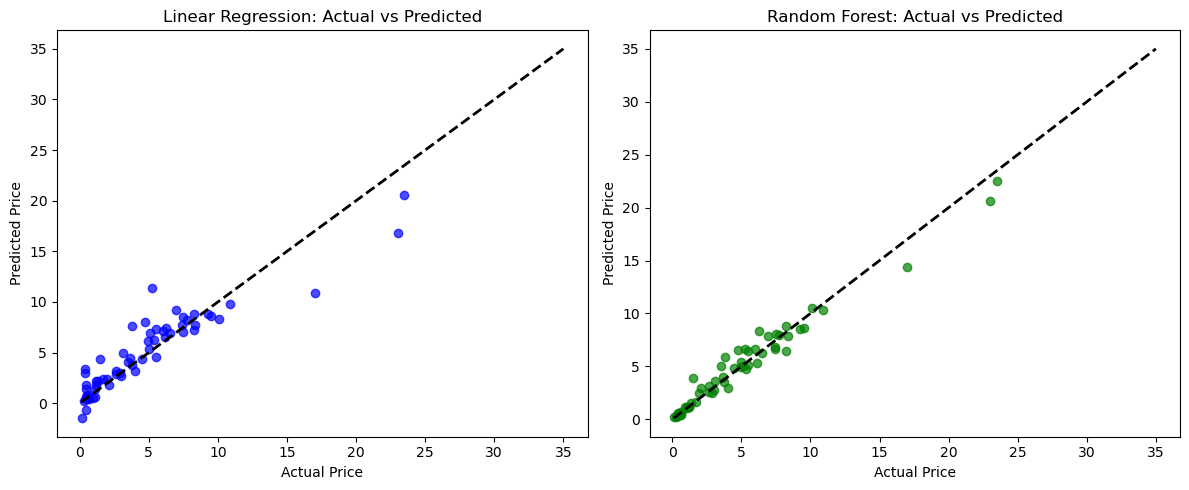

In [29]:
# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.tight_layout()
plt.show()
